# Arrestos en ciudades de USA 

(*An Introduction to Statistical Learning - with Applications in R* de Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani.)

El dataset contiene el número de arrestos cada 100.000 residentes para cada uno de los tres crimenes: ataque, asesinato, violación. UrbanPop es el porcentaje de la población en cada estado que vive en areas urbanas.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Creamos un DataFrame de Pandas importando el archivo csv USArrests.csv

df = pd.read_csv('../Data/USArrests.csv', index_col=0)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Text(0.5, 1, 'Correlacion entre features')

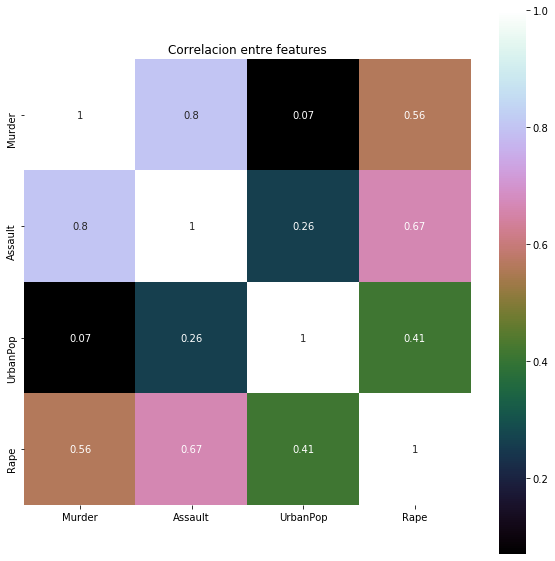

In [5]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlacion entre features')

Necesitamos variables con media 0 y varianza 1:

In [4]:
# Observamos la media de las variables
print("Media de las variables: ")
print(df.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de las variables: ")
print(df.var(axis=0))

Media de las variables: 
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64


Varianza de las variables: 
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [5]:
# Normalizamos los datos utilizando el objeto StdSclr:

from sklearn.preprocessing import StandardScaler
# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()

df_std = pd.DataFrame(StdSclr.fit_transform(df), index=df.index, columns=df.columns)
df_std.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [6]:
# Observamos nuevamente la media de las variables:
print("Media de las variables: ")
print(df_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(df_std.var(axis=0))

Media de las variables: 
Murder     -8.437695e-17
Assault     1.298961e-16
UrbanPop   -4.263256e-16
Rape        8.326673e-16
dtype: float64


Varianza de las variables: 
Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64


In [8]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html
# If rowvar is True (default), then each row represents a variable, with observations in the columns. 
covarianzas = np.cov(df_std, rowvar = False)
display(covarianzas)

#otra forma de calcular la matriz de covarianzas:
mean_vec = np.mean(df_std, axis=0)
cov_mat = (df_std - mean_vec).T.dot((df_std - mean_vec)) / (df_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

array([[1.02040816, 0.81823807, 0.07099247, 0.57508044],
       [0.81823807, 1.02040816, 0.2641548 , 0.67881758],
       [0.07099247, 0.2641548 , 1.02040816, 0.41973595],
       [0.57508044, 0.67881758, 0.41973595, 1.02040816]])

Covariance matrix 
            Murder   Assault  UrbanPop      Rape
Murder    1.020408  0.818238  0.070992  0.575080
Assault   0.818238  1.020408  0.264155  0.678818
UrbanPop  0.070992  0.264155  1.020408  0.419736
Rape      0.575080  0.678818  0.419736  1.020408


Text(0.5, 1.0, 'Correción entre features')

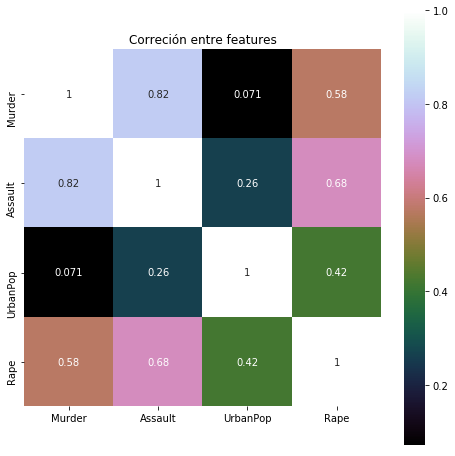

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correción entre features')

Entonces vemos que la covarianza de las variables estandarizadas es lo mismo que la correlación

El análisis de componentes principales basado en la matriz de correlaciones es equivalente al análisis de componentes principales con las variables estandarizadas

Descomposición en autovectores y autovalores:

In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]

Eigenvalues 
[2.53085875 1.00996444 0.17696948 0.36383998]


Ordeno los autovalores de mayor a menor:

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#eig_pairs
# Sort the (eigenvalue, eigenvector) tuples from high to low
#ordeno por el primer elemento de cada tupla: el autovalor
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.5308587542341763
1.0099644413671849
0.36383998018452046
0.17696947727534226


Varianza explicada:

In [14]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(tot)
print(var_exp)

4.081632653061224
[62.00603947873733, 24.744128813496037, 8.914079514520754, 4.335752193245886]


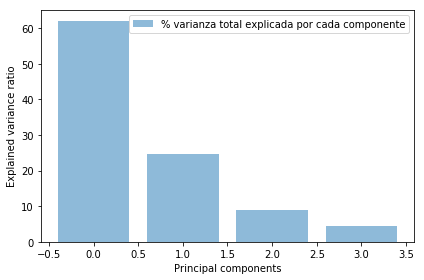

In [15]:
plt.bar(range(4), var_exp, alpha=0.5, align='center', label='% varianza total explicada por cada componente')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Me quedo con dos componentes:

In [16]:
# tengo que armar una matriz donde cada autovector sea una columna
# convierto el autovector de max autovalor (indice 0) en una columna
eig_pairs[0][1].reshape(4,1)

array([[0.53589947],
       [0.58318363],
       [0.27819087],
       [0.54343209]])

In [18]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.53589947  0.41818087]
 [ 0.58318363  0.1879856 ]
 [ 0.27819087 -0.87280619]
 [ 0.54343209 -0.16731864]]


Calculo las coordenadas de las observaciones en el subespacio generado por los autovecotres:

In [19]:
Y = df_std.dot(matrix_w)
Y

,0,1
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934
Colorado,1.514563,-0.987555
Connecticut,-1.358647,-1.088928
Delaware,0.047709,-0.325359
Florida,3.013042,0.039229
Georgia,1.639283,1.278942


Usando scikit-learn:


In [20]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(df_std)
print(Y_sklearn)

[[ 0.98556588  1.13339238]
 [ 1.95013775  1.07321326]
 [ 1.76316354 -0.74595678]
 [-0.14142029  1.11979678]
 [ 2.52398013 -1.54293399]
 [ 1.51456286 -0.98755509]
 [-1.35864746 -1.08892789]
 [ 0.04770931 -0.32535892]
 [ 3.01304227  0.03922851]
 [ 1.63928304  1.2789424 ]
 [-0.91265715 -1.57046001]
 [-1.63979985  0.21097292]
 [ 1.37891072 -0.68184119]
 [-0.50546136 -0.15156254]
 [-2.25364607 -0.10405407]
 [-0.79688112 -0.2701647 ]
 [-0.75085907  0.95844029]
 [ 1.56481798  0.87105466]
 [-2.39682949  0.37639158]
 [ 1.76336939  0.42765519]
 [-0.48616629 -1.4744965 ]
 [ 2.10844115 -0.15539682]
 [-1.69268181 -0.63226125]
 [ 0.99649446  2.39379599]
 [ 0.69678733 -0.26335479]
 [-1.18545191  0.53687437]
 [-1.26563654 -0.19395373]
 [ 2.87439454 -0.7756002 ]
 [-2.38391541 -0.01808229]
 [ 0.18156611 -1.44950571]
 [ 1.98002375  0.14284878]
 [ 1.68257738 -0.82318414]
 [ 1.12337861  2.22800338]
 [-2.99222562  0.59911882]
 [-0.22596542 -0.74223824]
 [-0.31178286 -0.28785421]
 [ 0.05912208 -0.54141145]
 